In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_data = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
df_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [10]:
df_data.shape

(159571, 8)

In [11]:
df_test.shape

(153164, 2)

In [13]:
df_data.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [14]:
df_test.isna().sum()

id              0
comment_text    0
dtype: int64

In [15]:
df_data.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


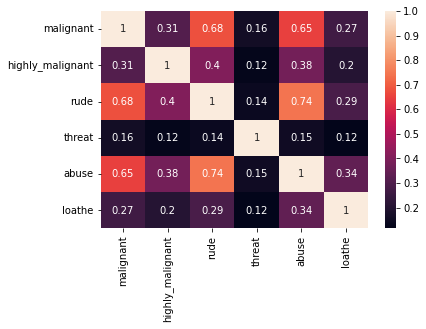

In [17]:
sns.heatmap(df_data.corr(),annot=True)
plt.show()

In [19]:
df_data.skew().sort_values()

malignant            2.745854
rude                 3.992817
abuse                4.160540
highly_malignant     9.851722
loathe              10.515923
threat              18.189001
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


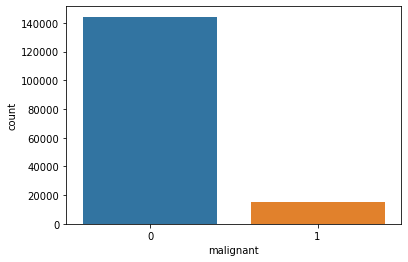

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


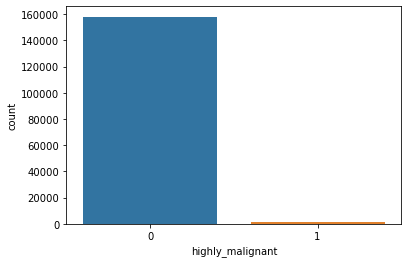

loathe


0    158166
1      1405
Name: loathe, dtype: int64


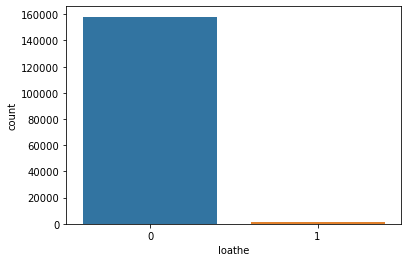

rude


0    151122
1      8449
Name: rude, dtype: int64


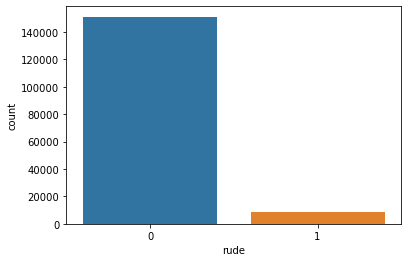

abuse


0    151694
1      7877
Name: abuse, dtype: int64


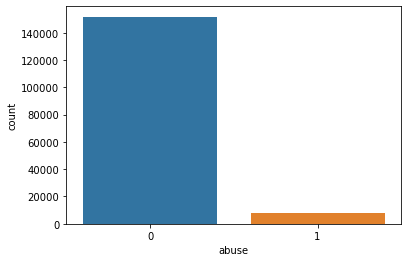

threat


0    159093
1       478
Name: threat, dtype: int64


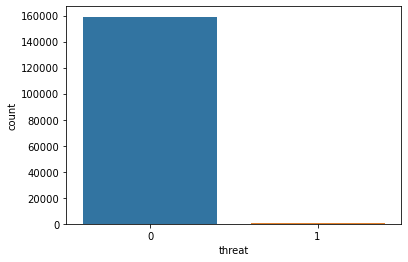

In [20]:
col_name=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col_name:
    print(i)
    print("\n")
    print(df_data[i].value_counts())
    sns.countplot(df_data[i])
    plt.show()

In [38]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [22]:
df_data['length'] = df_data['comment_text'].str.len()
df_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [23]:
df_data['comment_text'] = df_data['comment_text'].str.lower()
df_data["comment_text"].head()

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object

In [24]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
df_data["comment_text"].head()

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object

In [25]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'£|\$', 'dollers')
df_data["comment_text"].head()

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object

In [26]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
df_data["comment_text"].head()

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object

In [27]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')
df_data["comment_text"].head()

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object

In [28]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'[^\w\d\s]', ' ')
df_data["comment_text"].head()

0    explanation\nwhy the edits made under my usern...
1    d aww  he matches this background colour i m s...
2    hey man  i m really not trying to edit war  it...
3     \nmore\ni can t make any real suggestions on ...
4    you  sir  are my hero  any chance you remember...
Name: comment_text, dtype: object

In [29]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'\s+', ' ')
df_data['comment_text'].head()

0    explanation why the edits made under my userna...
1    d aww he matches this background colour i m se...
2    hey man i m really not trying to edit war it s...
3     more i can t make any real suggestions on imp...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

In [30]:
df_data['comment_text'] = df_data['comment_text'].str.replace(r'^\s+|\s+?$', '')
df_data['comment_text'].head()

0    explanation why the edits made under my userna...
1    d aww he matches this background colour i m se...
2    hey man i m really not trying to edit war it s...
3    more i can t make any real suggestions on impr...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

In [31]:
df_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


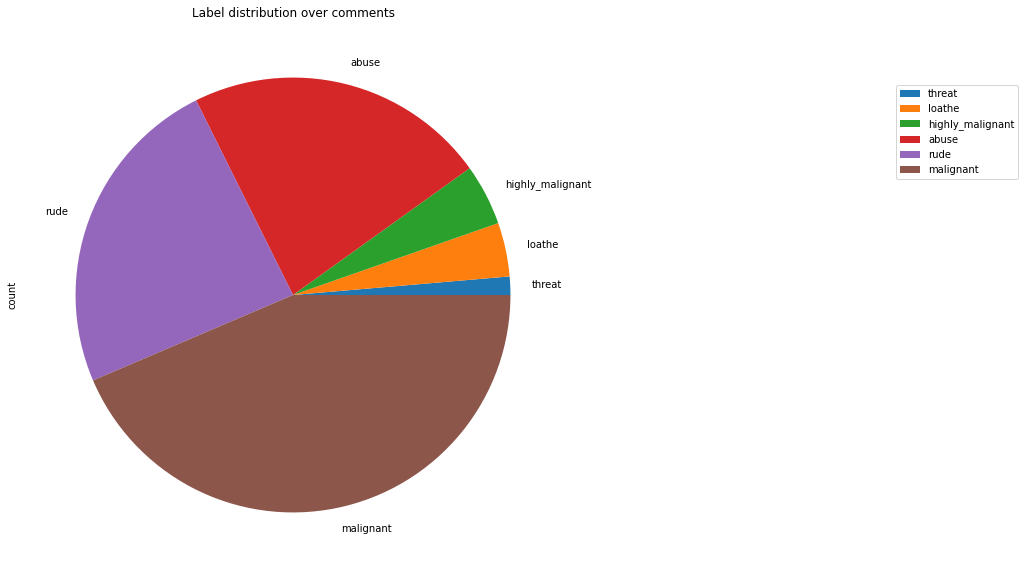

In [42]:
cols_output = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df_data[cols_output].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.6, 0.8))

In [43]:
target_data = df_data[cols_output]
target_data.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [96]:
df_data['bad'] =df_data[cols_output].sum(axis =1)
print(df_data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64


In [101]:
df_data['bad'] = df_data['bad'] > 0
df_data['bad'].value_counts()

False    143346
True      16225
Name: bad, dtype: int64

In [100]:
df_data['bad'] = df_data['bad'].astype(int)
print(df_data['bad'].value_counts())

0    143346
1     16225
Name: bad, dtype: int64


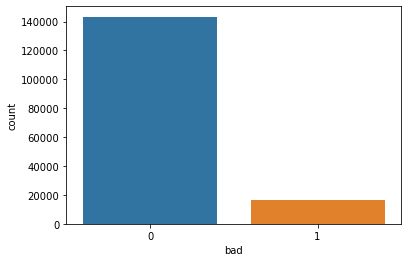

In [47]:
sns.countplot(x="bad" , data = df_data)
plt.show()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_data['comment_text'])
x = features

In [50]:
print(x)

  (0, 6067)	0.17017728219002906
  (0, 7579)	0.28286312895492577
  (0, 6348)	0.10188863652608571
  (0, 8817)	0.10309004159026534
  (0, 8890)	0.19252239674802524
  (0, 7441)	0.1691601391507429
  (0, 2721)	0.11714891354486348
  (0, 3262)	0.2752627811519855
  (0, 9975)	0.23903677593471298
  (0, 5932)	0.1480682908013191
  (0, 9638)	0.27358338591087894
  (0, 3718)	0.282687808029256
  (0, 1612)	0.3188247783784796
  (0, 4864)	0.11051443788418237
  (0, 9753)	0.25716101891105947
  (0, 7604)	0.18245951452518086
  (0, 3320)	0.23603561596636682
  (0, 4013)	0.3116799838128647
  (0, 9452)	0.2171636982520937
  (0, 2886)	0.15067991559863486
  (0, 3222)	0.21216752125875313
  (1, 9465)	0.2048394641604147
  (1, 4757)	0.29460174774880804
  (1, 8945)	0.17358128089139319
  (1, 8588)	0.347732116369702
  :	:
  (159568, 544)	0.13202447465884334
  (159568, 105)	0.2874404047946888
  (159569, 5267)	0.444602193604548
  (159569, 106)	0.3645330300003908
  (159569, 9551)	0.42654400620515087
  (159569, 5167)	0.25042937

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
y=df_data['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [53]:
y_train.shape,y_test.shape

((127656,), (31915,))

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [55]:
df = DecisionTreeClassifier()

In [56]:
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
df.score(x_test,y_test)

0.9417828607237976

In [58]:
y_pred = df.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred)

0.9417828607237976

In [61]:
f1_score(y_test,y_pred)

0.7082286432160805

In [63]:
confusion_matrix(y_test,y_pred)

array([[27802,   869],
       [  989,  2255]], dtype=int64)

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
rf.score(x_test,y_test)

0.9583894720350932

In [67]:
y_pred = rf.predict(x_test)

In [68]:
confusion_matrix(y_test,y_pred)

array([[28332,   339],
       [  989,  2255]], dtype=int64)

In [69]:
f1_score(y_test,y_pred)

0.7725248372730388

In [70]:
accuracy_score(y_test,y_pred)

0.9583894720350932

In [71]:
lm = LogisticRegression()

In [72]:
lm.fit(x_train,y_train)

LogisticRegression()

In [73]:
lm.score(x_test,y_test)

0.956102146326179

In [74]:
gb = GradientBoostingClassifier()

In [75]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [76]:
gb.score(x_test,y_test)
y_pred = gb.predict(x_test)
confusion_matrix(y_test,df.predict(x_test))

array([[27802,   869],
       [  989,  2255]], dtype=int64)

In [77]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [78]:
ad.score(x_test,y_test)

0.945542848190506

In [79]:
y_pred = ad.predict(x_test)

In [80]:
confusion_matrix(y_test,ad.predict(x_test))

array([[28457,   214],
       [ 1524,  1720]], dtype=int64)

In [81]:
from sklearn import preprocessing, neighbors

In [82]:
clf = neighbors.KNeighborsClassifier()

In [83]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
clf.score(x_test,y_test)

0.9127996240012534

In [88]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [89]:
predict=rf.predict(test_data)
predict

array([1, 0, 0, ..., 0, 0, 0])

In [94]:
import joblib

In [95]:
joblib.dump(rf,'comm.pkl')

['comm.pkl']